# Mantenimiento Predictivo — Versión Portfolio

Este cuaderno guía paso a paso el proceso completo para un proyecto de mantenimiento predictivo, con explicaciones claras antes de cada bloque importante y manteniendo el código original intacto. La estructura cubre desde la carga y exploración de datos, hasta la evaluación del modelo y la presentación de resultados.

## 13. Visualización de resultados

Se generan gráficos y visualizaciones que permiten interpretar patrones, resultados y la importancia de las variables.

In [56]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fijar la "seed"
np.random.seed(1234)
seed = 0

# Importar datos FD001 y comprenderlos

## 1. Carga y validación de datos

En esta sección se realiza la carga de los datos desde las fuentes disponibles y su validación inicial. Se comprueba el formato, los separadores, la codificación y los tipos de datos básicos para asegurar que la información se ha importado correctamente.

## 2. Exploración rápida (EDA inicial)

Aquí se visualizan algunas filas de ejemplo para obtener una idea general de la estructura de los datos y detectar posibles anomalías evidentes o errores de formato.

In [57]:
df_train = pd.read_csv('Data/train_FD001.txt', sep=' ', header=None)
df_test = pd.read_csv('Data/test_FD001.txt', sep=' ', header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


## 3. Dimensiones y esquema

Se revisa la forma del dataset (número de filas y columnas) y el tipo de cada variable para entender la estructura y planificar el análisis.

In [58]:
df_train.shape

(20631, 28)

In [59]:
df_train.dtypes

0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21      int64
22      int64
23    float64
24    float64
25    float64
26    float64
27    float64
dtype: object

In [60]:
df_train.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    20631
27    20631
dtype: int64

## 4. Limpieza de datos

Se tratan valores nulos, duplicados y datos incoherentes. Este paso es fundamental para garantizar la calidad de la información antes del modelado.

In [63]:
df_train = df_train.dropna(axis=1, how='all')
df_test = df_test.dropna(axis=1, how='all')
df_train


,unit number,time cycles,operational set 1,operational set 2,operational set 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [65]:
nombres_columnas = ['unit number','time cycles','operational set 1','operational set 2','operational set 3']
nombres_columnas+=[f"sensor_{i+1}" for i in range(len(df_train.columns) - len(nombres_columnas))]
df_train.columns = nombres_columnas
df_test.columns = nombres_columnas
df_train

,unit number,time cycles,operational set 1,operational set 2,operational set 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


df_train.shape

## 5. Transformaciones y agregaciones

Se aplican transformaciones como agrupaciones, uniones o pivotes para llevar los datos a la granularidad necesaria para el análisis.

In [66]:
# Calcular RUL
# Aquí asumimos que el ciclo máximo es 200 para cada unidad
max_ciclo = df_train.groupby('unit number')['time cycles'].max().reset_index()#asigna un nuevo indice numerico para que no sea la unidad, asi la unidad queda como columna
max_ciclo.columns=['unit number','max_ciclo']
max_ciclo.head()



,unit number,max_ciclo
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


Se van a unir los dos data frame utilizando la herramienta merge

In [67]:
train_merged=df_train.merge(max_ciclo, left_on='unit number',right_on='unit number',how='inner')# left on y right on le estan indicando por donde comienza cada data frame y el how inner si alguna fila no coincidiera la eliminaria
train_merged.head()
train_merged.head()

,unit number,time cycles,operational set 1,operational set 2,operational set 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_ciclo
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192


In [68]:
train_merged['RUL']= train_merged['max_ciclo']-train_merged['time cycles']
train_merged.drop('max_ciclo',axis=1, inplace=True)
train_merged.head()

,unit number,time cycles,operational set 1,operational set 2,operational set 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [69]:
train_merged['unit number'].value_counts# tambien podriamso utilizar el unique() # ¿Cuantas unidades tenemos?
Max_rul=train_merged['RUL'].max() #Valor maximo del RUL
train_merged.isna().sum() # Valores no nulos 
train_merged[train_merged['unit number']!=18] # eliminamos el motor 18 por anomalia 


,unit number,time cycles,operational set 1,operational set 2,operational set 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


## 6.Visualización de los datos

Voy a sacar la matriz de correlaciones para ver si puedo descargar alguna variable

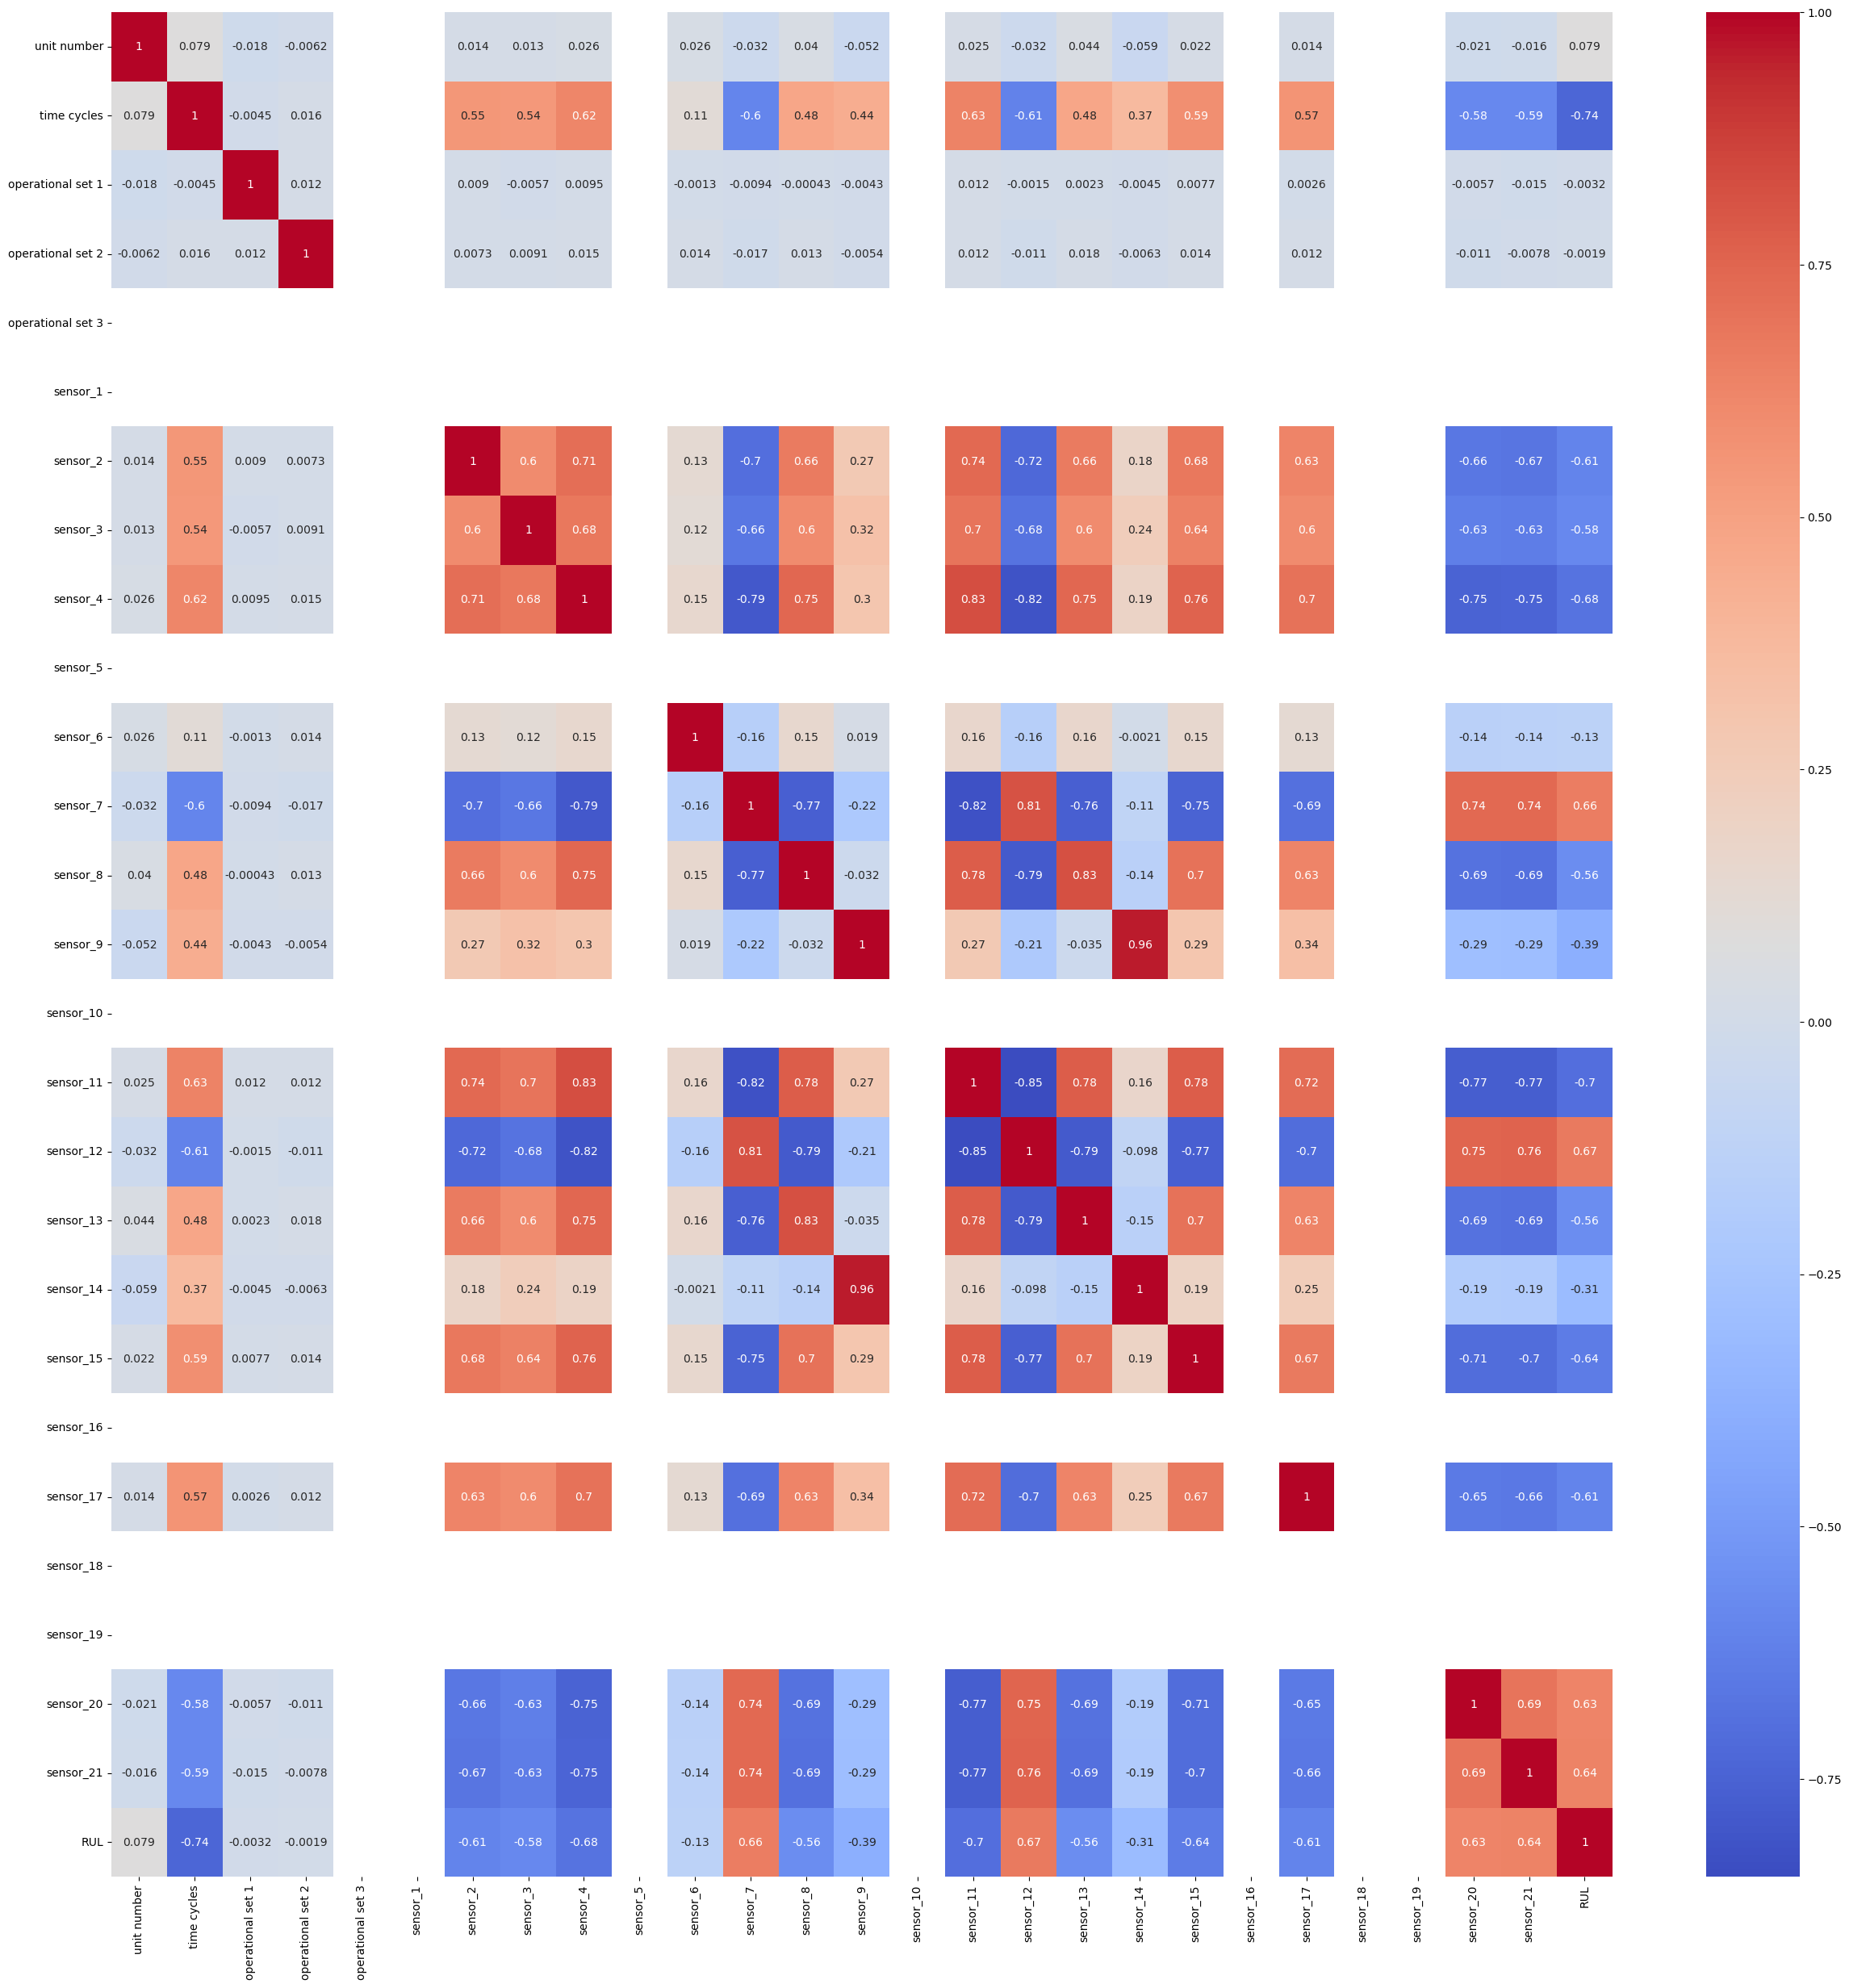

In [70]:
# Calcular la matriz de correlación
corr_matrix = train_merged.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

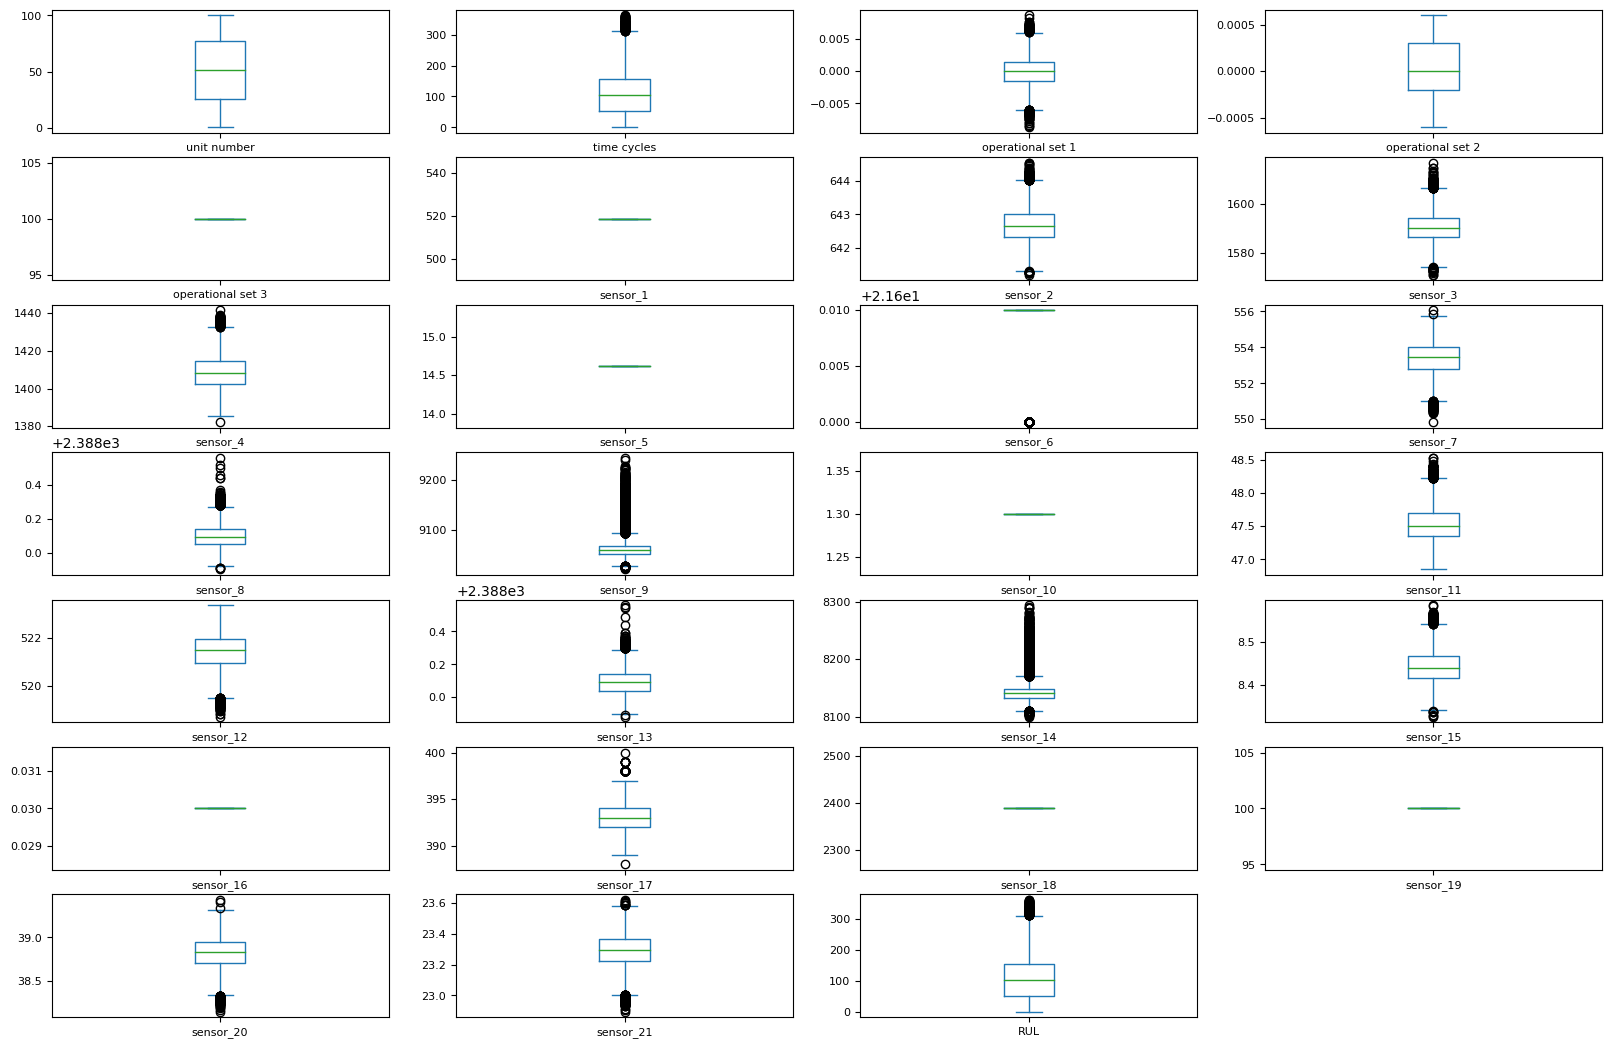

In [71]:
#Box plot para atributos
boxplot = train_merged.plot(kind='box', subplots=True, layout=(8,4),figsize=(20,15), sharex=False, sharey=False,fontsize=8)

Vamos a eliminar las variables que no nos aportan informacion para nuestro modelo

In [72]:
train_new = train_merged.drop(train_merged.columns[0:5], axis=1)


In [73]:
train_last = train_new.drop(['sensor_1','sensor_5','sensor_10','sensor_16','sensor_18','sensor_19'], axis=1)
train_last

,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


## 7. Ingeniería de características

Se crean nuevas variables que pueden aportar información adicional al modelo, como variables temporales, lags, ventanas móviles o codificaciones.

In [74]:
# Features X ; Target y 
X = train_last.drop(['RUL'], axis=1) 
y = train_last['RUL']

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #Creo un atriubto 
X_df = X.copy() # hago una copia del data set (seguridad)
X_scaled = pd.DataFrame(scaler.fit_transform(X_df))#escalo
X_scaled.columns = X_df.columns # vuelvo a darle nombre 
X_scaled.head() # miro las 5 primeras 

,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502


## 8. Modelado

Se entrena uno o varios modelos de machine learning, ajustando parámetros y eligiendo el más adecuado para el problema.

## 9. Predicción

Se utilizan los modelos entrenados para generar predicciones y obtener los resultados que se evaluarán posteriormente.

In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_scaled, y)


RandomForestRegressor()

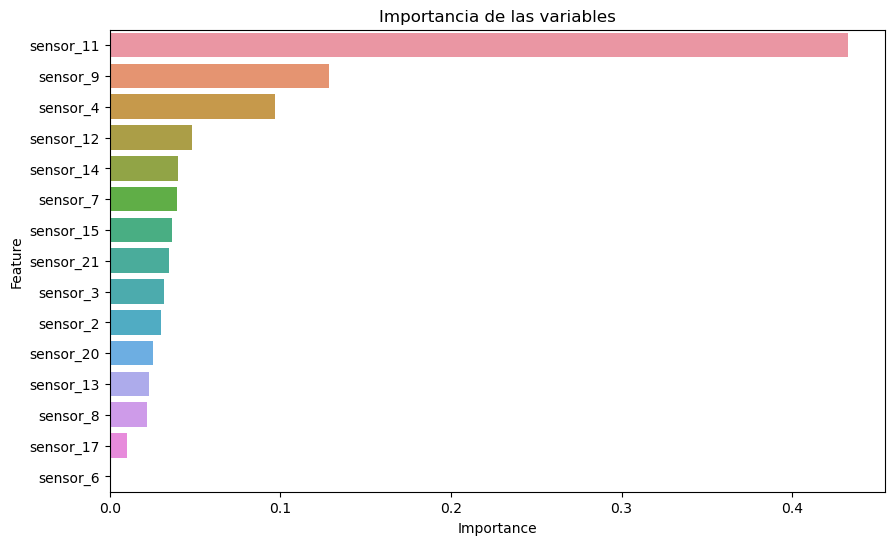

In [77]:
# Obtener y graficar la importancia de las variables
importances = model.feature_importances_

# Crear un DataFrame para visualizar la importancia
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': importances})

# Ordenar las características por importancia
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las variables')
plt.show()




Aqui viendo la importancia de los sensores he decidido poner como una barrera de que los sensores que representaran menos del 0,05 los descarte. Creo que quizas me he quedado con pocos sensores para el modelo.

In [78]:
# Establecer un umbral para eliminar características de baja importancia
threshold = 0.05

# Filtrar las características que tienen una importancia superior al umbral
features_to_keep = feature_importance[feature_importance['Importance'] > threshold]['Feature']

# Filtrar el conjunto de datos original para conservar solo las características seleccionadas
X_filtered = X_scaled[features_to_keep]
X_filtered


,sensor_11,sensor_9,sensor_4
0,0.369048,0.109755,0.309757
1,0.380952,0.100242,0.352633
2,0.250000,0.140043,0.370527
3,0.166667,0.124518,0.331195
4,0.255952,0.149960,0.404625
...,...,...,...
20626,0.726190,0.196491,0.782917
20627,0.708333,0.194651,0.866475
20628,0.738095,0.198196,0.775321
20629,0.916667,0.233285,0.747468


## 10. Particionado y validación

Se divide el dataset en conjuntos de entrenamiento y prueba, y se define la estrategia de validación más adecuada (por ejemplo, validación temporal).

In [79]:
from sklearn.model_selection import train_test_split
# Primero dividimos el 80% de los datos para entrenamiento, y el 20% restante para validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered, y, test_size=0.2, shuffle=False)# con 0.3 puedo hacer el entrenamiento con 70%

# Ahora dividimos el 20% restante (X_temp, y_temp) en 50% validación y 50% prueba → cada uno será 10% del total
X_val, X_test, y_val, y_test = train_test_split(X_filtered, y, test_size=0.5, shuffle=False)

# Evaluación del Modelo

## 11. Métricas y evaluación

Se miden las predicciones con métricas adecuadas (precisión, recall, F1, AUC, RMSE, etc.) y se analizan los errores para entender el rendimiento.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

num_folds = 5
error_metrics = {'neg_root_mean_squared_error', 'r2'}
models = {('LR', LinearRegression()),('RFR', RandomForestRegressor()),
          ('SVR', SVR()), ('GBR', GradientBoostingRegressor())}

Evaluation metric:  r2
Model  RFR
Model  GBR
Model  SVR
Model  LR
[('RFR', 0.5546439498607894, 0.0748909278165127), ('GBR', 0.60397221141823, 0.0837757459812006), ('SVR', 0.6052760579378088, 0.09461338249188102), ('LR', 0.5643327181993535, 0.08553325548153512)]


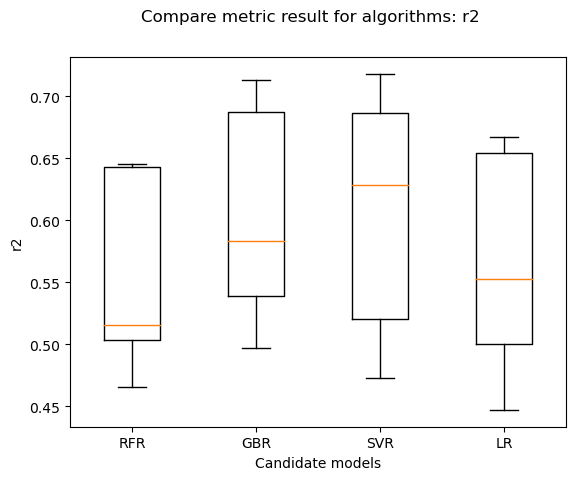

Evaluation metric:  neg_root_mean_squared_error
Model  RFR
Model  GBR
Model  SVR
Model  LR
[('RFR', -43.73791582297711, 6.107412501637326), ('GBR', -41.237593907403436, 6.828656507177985), ('SVR', -41.183425017529565, 7.572582858743785), ('LR', -43.26168156343482, 6.782569548788704)]


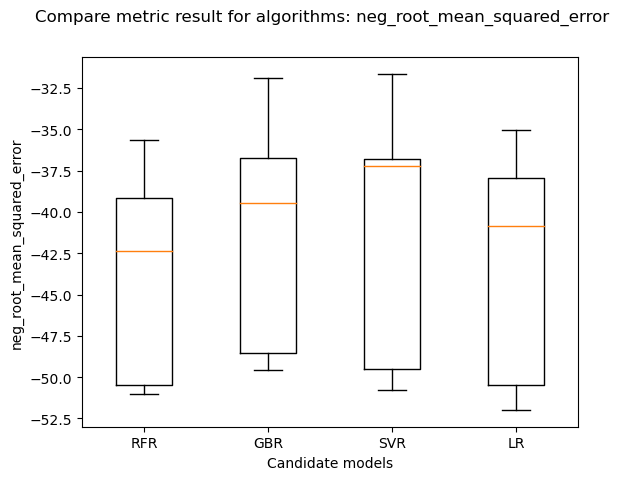

In [81]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Cross-validation training
for scoring in error_metrics: # recorro las metricas RMSE Y R2
    results = [] # se almacenan los resultados de la validacion 
    msg = []  # resumen de resultados
    names = []  # nombres de los modelos 
    print('Evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = KFold(n_splits=num_folds, shuffle=False)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []


In [ ]:
He utilizado el SVR como modelo, para hacer el ajuste de los hiperparametros estuve utilizando tanto chat gpt como la pagina web scikit-learn.

In [82]:
from sklearn.model_selection import GridSearchCV, KFold
modelo = SVR()
params = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'kernel': ['rbf', 'linear'],  # Tipo de kernel
    'gamma': ['scale', 'auto'],  # Coeficiente del kernel
    'epsilon': [0.1, 0.2, 0.5]  # Ancho de la zona de margen
}

cross_validation = KFold(n_splits=5, shuffle=False)
scoring = 'r2'  # Usamos R² como métrica de evaluación

# Crear y ejecutar GridSearchCV
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=cross_validation)
gsearch.fit(X_val, y_val)  # Entrenamos el modelo con los datos de validación

# Imprimir el mejor resultado y los hiperparámetros correspondientes
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))




Best result: 0.674421 using the following hyperparameters {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}


Aplicamos el mejor resultado del modelo a los datos

In [83]:
from sklearn.metrics import r2_score

# Definir el modelo con los mejores hiperparámetros
best_model_svr = SVR(C=10, epsilon=0.5, gamma='scale', kernel='rbf')

# Entrenar el modelo con los datos de entrenamiento
best_model_svr.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred_svr = best_model_svr.predict(X_test)

# Evaluación R²
r2_svr = r2_score(y_test, y_pred_svr)
print(f"R²: {r2_svr:.3f}")


R²: 0.514


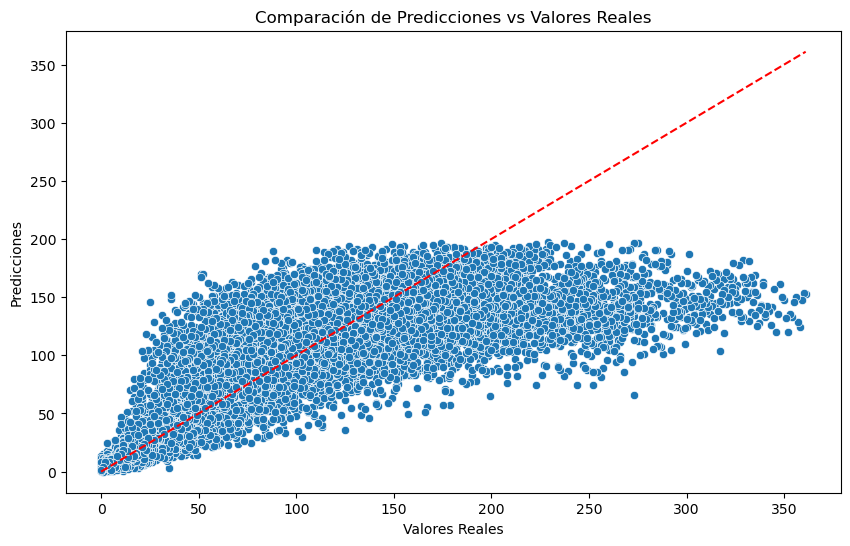

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los valores reales vs las predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()


# Conlusiones 

Observo que para valores a partir de los 200 RUL, el modelo no seria lo suficientemente robusto nos estaria indicando de hacer el mantenimiento bastante antes de lo que realmente seria necesario.